# 5.1 数学的準備

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## 1変数関数

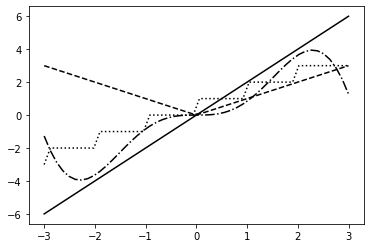

In [35]:
import math


def sin(x):
    return x * x * math.sin(x)

def floor(x): 

    #return np.int(x)
    return math.ceil(x)

x = np.linspace(-3, 3)
f1 = lambda x: 2 * x
f2 = lambda x: abs(x)
f3 = np.vectorize(sin)
f4 = np.vectorize(floor)

plt.plot(x, f1(x), color='k', linestyle='-')
plt.plot(x, f2(x), color='k', linestyle='--')
plt.plot(x, f3(x), color='k', linestyle='-.')
plt.plot(x, f4(x), color='k', linestyle=':')
plt.show()

## 2変数関数

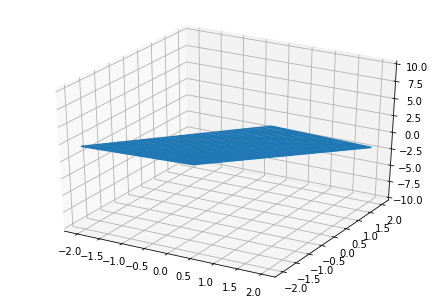

In [41]:
from mpl_toolkits.mplot3d import Axes3D


x = y = np.linspace(-2, 2)
x, y = np.meshgrid(x, y)

g1 = lambda x: 2*x[0] - 3*x[1]

ax = Axes3D(plt.figure())
ax.plot_wireframe(x, y, g1([x,y]), rstride=2, cstride=2)
plt.show()

### 等高線

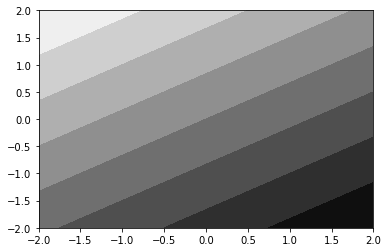

In [42]:
plt.contourf(x, y, g1([x,y]), cmap=plt.cm.binary)

## 勾配ベクトル (gradient vector)とヘッセ行列 (Hessian matrix)

In [43]:
from sympy import *


x = [Symbol('x[0]'), Symbol('x[1]')]

f1 = lambda x: (x[0]+2*x[1] - 7)**2 + (2*x[0]+x[1]-5)**2

print([diff(f1(x), x[0]), diff(f1(x), x[1])])
print([[diff(f1(x), x[0], x[0]), diff(f1(x), x[0], x[1])],
       [diff(f1(x), x[1], x[0]), diff(f1(x), x[1], x[1])]])

[10*x[0] + 8*x[1] - 34, 8*x[0] + 10*x[1] - 38]
[[10, 8], [8, 10]]


In [44]:
import scipy.linalg as linalg


a = np.random.randint(-10, 10, (3,2))
A = np.dot(a.T, a)
print(A)
U = linalg.cholesky(A)
print(U)
print(np.dot(U.T, U))

[[ 97 -49]
 [-49  33]]
[[ 9.8488578  -4.97519621]
 [ 0.          2.87183263]]
[[ 97. -49.]
 [-49.  33.]]


## 制約なし最適化

### ニュートン法 (newton method)

In [46]:
f = lambda x: sum(100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2 for i in range(2))

nf = lambda x: np.array([-400 * x[0] * (-x[0]**2 + x[1]) + 2 * x[0] - 2,
                         -200 * x[0]**2 - 400 * x[1] * (-x[1]**2 + x[2]) + 202 * x[1] - 2,
                         -200 * x[1]**2 + 200 * x[2]])

Hf = lambda x: np.array([
                         [1200 * x[0]**2 - 400 * x[1] + 2,
                          -400 * x[0],
                          0],
                         [-400 * x[0], 1200 * x[1]**2 - 400 * x[2] + 202,
                          -400 * x[1]],
                         [0,
                          -400 * x[1],
                          200]
                         ])
x0 = [10, 10, 10]
MEPS = 1.0e-6

k = 0
while linalg.norm(nf(x0)) > MEPS:
    d = -np.dot(linalg.inv(Hf(x0)), nf(x0))
    x0 = x0 + d
    k = k + 1

print('iteration:', k)
print('Optimal solution:', x0)

iteration: 15
Optimal solution: [1. 1. 1.]


In [48]:
from scipy.optimize import minimize


f = lambda x: (1.5 - x[0] + x[0] * x[1])**2 + \
        (2.25 - x[0] + x[0] * x[1]**2)**2 + \
        (2.625 - x[0] + x[0] * x[1]**3)**2
x0 = [0, 0]
res = minimize(f, x0, method='BFGS')
print(res)

      fun: 9.027274611464532e-15
 hess_inv: array([[3.23545604, 0.8083042 ],
       [0.8083042 , 0.22392594]])
      jac: array([-1.33888185e-07,  1.13254775e-06])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([3.00000012, 0.50000005])


## 凸2次最適化問題

In [49]:
from cvxopt import solvers, matrix


Q = matrix(np.array([[2.0, -1.0], [-1.0, 3.0]]))
c = matrix(np.array([-2.0, -4.0]))
A = matrix(np.array([[-1.0, 0.0], [0.0, -1.0], [2.0, 3.0], [1.0, 4.0]]))
b = matrix(np.array([0.0, 0.0, 6.0, 5.0]))

sol = solvers.qp(P=Q, q=c, G=A, h=b)
print(sol)
print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -4.8105e+00 -6.4700e+00  1e+01  4e-01  3e+00
 1: -4.1678e+00 -5.6606e+00  1e+00  6e-17  3e-16
 2: -4.5418e+00 -4.6061e+00  6e-02  3e-17  1e-16
 3: -4.5465e+00 -4.5472e+00  7e-04  4e-17  3e-16
 4: -4.5465e+00 -4.5465e+00  7e-06  1e-16  3e-16
 5: -4.5465e+00 -4.5465e+00  7e-08  1e-17  2e-16
Optimal solution found.
{'x': <2x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 's': <4x1 matrix, tc='d'>, 'z': <4x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 7.284650158656667e-08, 'relative gap': 1.6022504205937292e-08, 'primal objective': -4.546511622045491, 'dual objective': -4.546511694891993, 'primal infeasibility': 1.4214949210266778e-17, 'dual infeasibility': 1.9860273225978183e-16, 'primal slack': 1.0081752643394897e-08, 'dual slack': 4.21430289047439e-09, 'iterations': 5}
[ 1.19e+00]
[ 9.53e-01]

-4.546511622045491


## 2次錐最適化問題 (second order conic optimization)
### ゴミ集積所決定問題

In [50]:
import picos as pic

socp = pic.Problem()
H = [0, 1, 2, 3, 4, 5, 6, 7]
p = [[44, 47], [64, 67], [67, 9], [83, 21],
     [36, 87], [70, 88], [88, 12], [58, 65]]
w = [1, 2, 2, 1, 2, 5, 4, 1]

X = socp.add_variable('X', 2)
d = [socp.add_variable('d['+str(i)+']',1) for i in H]
objective = sum(w[i]*d[i] for i in H)
socp.set_objective('min', objective)
socp.add_list_of_constraints([abs(p[i]-X) < d[i] for i in H])
res = socp.solve(solver='cvxopt')

        PICOS 1.2.0.post36         
Building a CVXOPT problem instance.
Solving the problem via CVXOPT.
-----------------------------------
 Python Convex Optimization Solver 
    via internal CONELP solver     
-----------------------------------
     pcost       dcost       gap    pres   dres   k/t
 0: -3.2863e-14 -1.5973e-14  9e+02  5e-01  6e-17  1e+00
 1:  5.5052e+02  5.5465e+02  2e+02  1e-01  7e-16  4e+00
 2:  6.0315e+02  6.0404e+02  4e+01  2e-02  3e-16  9e-01
 3:  6.1384e+02  6.1426e+02  1e+01  9e-03  4e-16  4e-01
 4:  6.1807e+02  6.1814e+02  1e+00  7e-04  5e-16  7e-02
 5:  6.1856e+02  6.1856e+02  6e-02  4e-05  2e-15  4e-03
 6:  6.1859e+02  6.1859e+02  2e-03  1e-06  5e-14  1e-04
 7:  6.1859e+02  6.1859e+02  9e-05  6e-08  4e-13  6e-06
 8:  6.1859e+02  6.1859e+02  2e-06  2e-09  4e-12  1e-07
Optimal solution found.
------------[ CVXOPT ]-------------
Solution is optimal after 8.0e-02s.
=============[ PICOS ]=============


In [51]:
print(X.value[0])
print(X.value[1])

64.00000030746362
66.99999955529725


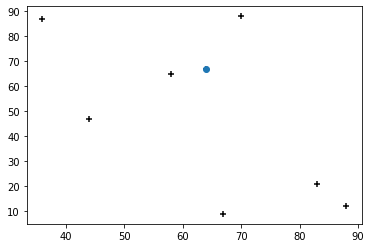

In [52]:
x = np.array(p)[:,0]
y = np.array(p)[:,1]
plt.scatter(x, y, color='k', marker='+')
plt.scatter(X.value[0], X.value[1], marker='o')
plt.show()